### Gerar QRcode a partir das sequências

- Obter os qrcode atráves das sequências dos miRNAs.

In [1]:
!pip install biopython

In [1]:
# Imports
from Bio import Entrez
from Bio import SeqIO
import pandas as pd

In [11]:
array_seq = []
file = '/home/marcos/Desktop/TCC_2020/dados/hairpin.fa'

input_seq_iterator = SeqIO.parse(file, "fasta")
# Build a list of short sequences:
short_sequences = [record for record in input_seq_iterator if len(record.seq) < 60]

print("Found %i short sequences" % len(short_sequences))

SeqIO.write(short_sequences, "/home/marcos/Desktop/TCC_2020/dados/short_seqs.fasta", "fasta")

file2 = '/home/marcos/Desktop/TCC_2020/dados/short_seqs.fasta'

for i in SeqIO.parse(file2, "fasta"):
    array_seq.append(str(i.seq))

#print(array_seq)



Found 1398 short sequences


In [12]:
# Número de seqências obtidas
print(len(array_seq))

1398


In [14]:
# Tamanho da primeira sequência da lista
print(len(array_seq[1]))

59


### Transformando sequências em códigos QR

In [15]:
#!pip install qrcode

In [16]:
import qrcode
import shutil

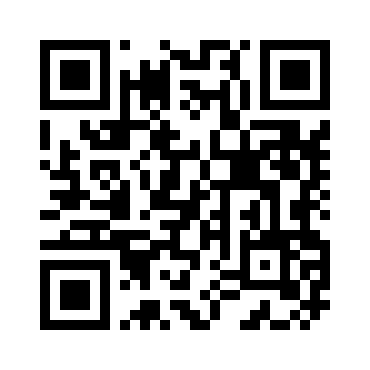

In [17]:
img = qrcode.make(array_seq[0])
img

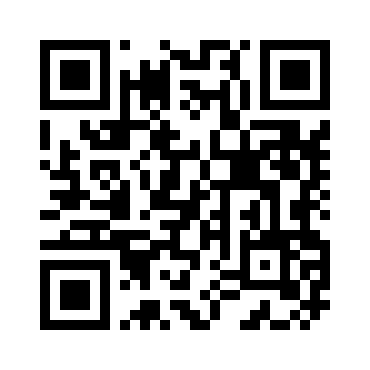

In [8]:
img = qrcode.make(array_seq[0])
img

In [19]:
# TENTAR PARALELIZAR O PROCESSO USANDO DASK
count = 0
for seq in array_seq:
    count+=1    
    # Gerando qrcode a partir do array_seq  
    img = qrcode.make(seq)
    
    # Salvando a imagem
    filename = (f'seq{count}.jpeg')
    img.save(filename)
    
    # Salvando as imagens em um diretório especifico
    shutil.move(filename, '/home/marcos/Desktop/TCC_2020/notebooks/images_sequence_qrcode_hairpin')        
    
    if count % 500 == 0:
        print(f'Sequências lidas {count}')

Sequências lidas 500
Sequências lidas 1000
